In [1]:
from urllib.request import urlopen
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
!python3 -m spacy download pl_core_news_lg

In [3]:
nlp = spacy.load("pl_core_news_lg") 

In [4]:
def book(url):
    return urlopen(url).read().decode("utf8")

In [5]:
palestyna = book('https://wolnelektury.pl/media/book/txt/pruszynski-palestyna-po-raz-trzeci.txt')
chlopi = book('https://wolnelektury.pl/media/book/txt/chlopi-czesc-pierwsza-jesien.txt')
zycie = book('https://wolnelektury.pl/media/book/txt/wyka-zycie-na-niby.txt')
hiszpania = book('https://wolnelektury.pl/media/book/txt/pruszynski-w-czerwonej-hiszpanii.txt')
ogniemimieczem = book('https://wolnelektury.pl/media/book/txt/ogniem-i-mieczem-tom-pierwszy.txt')

# Punkt 1. Przeprowadzić lematyzację tekstu pozostawiając formy podstawowe o długości minimum dwóch znaków dla tokenów będących rzeczownikami, czasownikami lub przymiotnikami, składającymi się wyłącznie z liter (bez znaków interpunkcyjnych, cyfr, znaków specjalnych itp.).

In [6]:
#Przeprowadzić lematyzację tekstu pozostawiając formy podstawowe o długości minimum dwóch znaków dla tokenów będących rzeczownikami,
# czasownikami lub przymiotnikami, składającymi się wyłącznie z liter (bez znaków interpunkcyjnych, cyfr, znaków specjalnych itp.).

def lemmatizer(document):
  tokens = []
  for word in nlp(document):
     #print(word)
     if word.pos_=='NOUN' or word.pos_ == 'VERB' or word.pos_ == 'ADJ':
       if len(word.lemma_) >= 2:
         if word.text.isalpha():
          tokens.append(word.lemma_)
  return tokens

In [7]:
palestyna_lem = lemmatizer(palestyna)
chlopi_lem = lemmatizer(chlopi)
zycie_lem = lemmatizer(zycie)
hiszpania_lem = lemmatizer(hiszpania)
ogniemimieczem_lem = lemmatizer(ogniemimieczem)

# Punkt 2. Zastosować stoplistę dla języka polskiego

In [8]:
# Zastosować stoplistę dla języka polskiego

def tokenizer(document): # tokenizer na potrzeby funkcji removeStopwords tylko i wyłącznie

    return [word.text.lower() for word in nlp(document) if word.text not in 
            '\n\r\t!"-—#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~' and word.text.isalpha()]

def removeStopwords(document):
    stopwords = tokenizer(urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8"))

    for word in document:
        if word in stopwords:
            document.remove(word)

    return document

In [9]:
palestyna_lem_with_stoplist = removeStopwords(palestyna_lem)
chlopi_lem_with_stoplist = removeStopwords(chlopi_lem)
zycie_lem_with_stoplist = removeStopwords(zycie_lem)
hiszpania_lem_with_stoplist = removeStopwords(hiszpania_lem)
ogniemimieczem_lem_with_stoplist = removeStopwords(ogniemimieczem_lem)

# Punkt 3. Wykorzystując wektoryzację TF-IDF oraz miarę podobieństwa cosinusowego, dla każdego dokumentu wyznaczyć jeden inny, najbardziej podobny dokument.

In [10]:
# Wykorzystując wektoryzację TF-IDF oraz miarę podobieństwa cosinusowego, dla każdego dokumentu wyznaczyć jeden inny, najbardziej podobny dokument.

# tworzę korpus dokumentów
corpus = []
corpus.append(" ".join(palestyna_lem_with_stoplist))
corpus.append(" ".join(chlopi_lem_with_stoplist))
corpus.append(" ".join(zycie_lem_with_stoplist))
corpus.append(" ".join(hiszpania_lem_with_stoplist))
corpus.append(" ".join(ogniemimieczem_lem_with_stoplist))

In [11]:
# wyznaczam macierz tf idf

tfidf  =TfidfVectorizer(smooth_idf=False)
tfs = tfidf.fit_transform(corpus) 
tfs2 = pd.DataFrame(tfs.toarray(), columns=tfidf.get_feature_names(), index= ['Palestyna po raz trzeci','Chłopi Jesień','Życie na niby','W czerwonej Hiszpanii','Ogniem i mieczem I'])
tfs2 # wyświetlenie macierzy Tf-IDF

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdulla,abdykacja,aber,ablucja,abo,abominacja,abreagieren,absencja,absolutny,absolutum,...,żądaniom,żądano,żądać,żądza,żądło,żć,żłob,żłobić,żłobk,żłób
Palestyna po raz trzeci,0.005885,0.000000,0.002942,0.002942,0.000000,0.000000,0.00000,0.00000,0.001379,0.000000,...,0.000000,0.00000,0.001128,0.001704,0.000000,0.000000,0.002161,0.00000,0.000000,0.000000
Chłopi Jesień,0.000000,0.000000,0.000000,0.000000,0.002116,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000811,0.000000,0.000000,0.002116,0.003108,0.00000,0.000000,0.008464
Życie na niby,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00279,0.00558,0.006539,0.000000,...,0.000000,0.00279,0.003208,0.000000,0.000000,0.000000,0.000000,0.00279,0.000000,0.000000
W czerwonej Hiszpanii,0.000000,0.001464,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.001372,0.001464,...,0.001464,0.00000,0.002805,0.002543,0.000000,0.000000,0.000000,0.00000,0.001464,0.000000
Ogniem i mieczem I,0.000000,0.000000,0.000000,0.000000,0.000000,0.002393,0.00000,0.00000,0.000561,0.000000,...,0.000000,0.00000,0.003668,0.002771,0.001197,0.000000,0.000000,0.00000,0.000000,0.000000


In [12]:
# wyznaczam macierz podobieństwa cosinusowego

counts = CountVectorizer().fit_transform(corpus) 
cosineSimilarity = pd.DataFrame(np.matrix(cosine_similarity(counts)))
cosineSimilarity.columns=['Palestyna po raz trzeci','Chłopi Jesień','Życie na niby','W czerwonej Hiszpanii','Ogniem i mieczem I']
cosineSimilarity.index = ['Palestyna po raz trzeci','Chłopi Jesień','Życie na niby','W czerwonej Hiszpanii','Ogniem i mieczem I']
cosineSimilarity # wyświetlenie macierzy podobieństwa cosinusowego

,Palestyna po raz trzeci,Chłopi Jesień,Życie na niby,W czerwonej Hiszpanii,Ogniem i mieczem I
Palestyna po raz trzeci,1.000000,0.552865,0.641040,0.838831,0.591945
Chłopi Jesień,0.552865,1.000000,0.415761,0.591935,0.677056
Życie na niby,0.641040,0.415761,1.000000,0.648763,0.480311
W czerwonej Hiszpanii,0.838831,0.591935,0.648763,1.000000,0.658675
Ogniem i mieczem I,0.591945,0.677056,0.480311,0.658675,1.000000


In [13]:
# dla każdego dokumentu wyznaczyć jeden inny, najbardziej podobny dokument.

#Najbardziej podobny dokument dla Palestyna po raz trzeci
max = 0.0
counter = 0
doc = ''
for index in cosineSimilarity.index:

  if max < cosineSimilarity['Palestyna po raz trzeci'][index] and cosineSimilarity['Palestyna po raz trzeci'][index] != cosineSimilarity['Palestyna po raz trzeci']['Palestyna po raz trzeci']:

    max = cosineSimilarity['Palestyna po raz trzeci'][index]
    doc = cosineSimilarity.index[counter]

  counter = counter + 1

print("Dla 'Palestyna po raz trzeci' najbardziej podobny dokument to : " + doc)

Dla 'Palestyna po raz trzeci' najbardziej podobny dokument to : W czerwonej Hiszpanii


In [14]:
#Najbardziej podobny dokument dla Chłopi Jesień
max = 0.0
counter = 0
doc = ''
for index in cosineSimilarity.index:

  if max < cosineSimilarity['Chłopi Jesień'][index] and cosineSimilarity['Chłopi Jesień'][index] != cosineSimilarity['Chłopi Jesień']['Chłopi Jesień']:

    max = cosineSimilarity['Chłopi Jesień'][index]
    doc = cosineSimilarity.index[counter]

  counter = counter + 1

print("Dla 'Chłopi Jesień' najbardziej podobny dokument to : " + doc)

Dla 'Chłopi Jesień' najbardziej podobny dokument to : Ogniem i mieczem I


In [15]:
#Najbardziej podobny dokument dla Życie na niby
max = 0.0
counter = 0
doc = ''
for index in cosineSimilarity.index:

  if max < cosineSimilarity['Życie na niby'][index] and cosineSimilarity['Życie na niby'][index] != cosineSimilarity['Życie na niby']['Życie na niby']:

    max = cosineSimilarity['Życie na niby'][index]
    doc = cosineSimilarity.index[counter]

  counter = counter + 1

print("Dla 'Życie na niby' najbardziej podobny dokument to : " + doc)

Dla 'Życie na niby' najbardziej podobny dokument to : W czerwonej Hiszpanii


In [16]:
#Najbardziej podobny dokument dla W czerwonej Hiszpanii
max = 0.0
counter = 0
doc = ''
for index in cosineSimilarity.index:

  if max < cosineSimilarity['W czerwonej Hiszpanii'][index] and cosineSimilarity['W czerwonej Hiszpanii'][index]!= cosineSimilarity['W czerwonej Hiszpanii']['W czerwonej Hiszpanii']:

    max = cosineSimilarity['W czerwonej Hiszpanii'][index]
    doc = cosineSimilarity.index[counter]

  counter = counter + 1

print("Dla 'W czerwonej Hiszpanii' najbardziej podobny dokument to : " + doc)

Dla 'W czerwonej Hiszpanii' najbardziej podobny dokument to : Palestyna po raz trzeci


In [17]:
#Najbardziej podobny dokument dla Ogniem i mieczem I
max = 0.0
counter = 0
doc = ''
for index in cosineSimilarity.index:

  if max < cosineSimilarity['Ogniem i mieczem I'][index] and cosineSimilarity['Ogniem i mieczem I'][index] != cosineSimilarity['Ogniem i mieczem I']['Ogniem i mieczem I']:

    max = cosineSimilarity['Ogniem i mieczem I'][index]
    doc = cosineSimilarity.index[counter]

  counter = counter + 1

print("Dla 'Ogniem i mieczem I' najbardziej podobny dokument to : " + doc)

Dla 'Ogniem i mieczem I' najbardziej podobny dokument to : Chłopi Jesień


In [18]:
# postanowiłem powyższe kroki polegające na wyznaczeniu najbardziej podobnych dokumentów wykonać raz jeszcze, ale za pomocą utworzonej do tego celu funkcji
def findTheMostSimilarDoc(docName):
  max = 0.0
  counter = 0
  doc = ''
  for index in cosineSimilarity.index:
    if max < cosineSimilarity[docName][index] and cosineSimilarity[docName][index] != cosineSimilarity[docName][docName]:
      max = cosineSimilarity[docName][index]
      doc = cosineSimilarity.index[counter]
    counter = counter + 1

  print("Dla dokumentu: " + docName + ", najbardziej podobny dokument to : " + doc)


In [19]:
# wysołania funkcji dla dokumentów
findTheMostSimilarDoc('Palestyna po raz trzeci')
findTheMostSimilarDoc('Chłopi Jesień')
findTheMostSimilarDoc('Życie na niby')
findTheMostSimilarDoc('W czerwonej Hiszpanii')
findTheMostSimilarDoc('Ogniem i mieczem I')

Dla dokumentu: Palestyna po raz trzeci, najbardziej podobny dokument to : W czerwonej Hiszpanii
Dla dokumentu: Chłopi Jesień, najbardziej podobny dokument to : Ogniem i mieczem I
Dla dokumentu: Życie na niby, najbardziej podobny dokument to : W czerwonej Hiszpanii
Dla dokumentu: W czerwonej Hiszpanii, najbardziej podobny dokument to : Palestyna po raz trzeci
Dla dokumentu: Ogniem i mieczem I, najbardziej podobny dokument to : Chłopi Jesień


# Punkt 4. Na bazie macierzy Document Term Matrix:
# Wykorzystać faktoryzację SVD do nienadzorowanego zamodelowania 2 (dwóch) tematów wśród dokumentów korpusu.
# Dysponując modelem tematów korpusu, zwizualizować położenie poszczególnych dokumentów w dwuwymiarowym układzie współrzędnych kartezjańskich.

In [20]:
# wyznaczenie Document Term Matrix

vectorizer = CountVectorizer()
A = vectorizer.fit_transform(corpus)
df= pd.DataFrame(A.toarray() , columns=vectorizer.get_feature_names())
df_with_index = df
df_with_index.index = ['Palestyna po raz trzeci','Chłopi Jesień','Życie na niby','W czerwonej Hiszpanii','Ogniem i mieczem I']
df_with_index

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdulla,abdykacja,aber,ablucja,abo,abominacja,abreagieren,absencja,absolutny,absolutum,...,żądaniom,żądano,żądać,żądza,żądło,żć,żłob,żłobić,żłobk,żłób
Palestyna po raz trzeci,2,0,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
Chłopi Jesień,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,0,0,4
Życie na niby,0,0,0,0,0,0,1,2,5,0,...,0,1,3,0,0,0,0,1,0,0
W czerwonej Hiszpanii,0,1,0,0,0,0,0,0,2,1,...,1,0,5,3,0,0,0,0,1,0
Ogniem i mieczem I,0,0,0,0,0,2,0,0,1,0,...,0,0,8,4,1,0,0,0,0,0


In [21]:
from sklearn.utils.extmath import randomized_svd

In [22]:
# wyznaczenie SVD
u, s, vt = randomized_svd(A.toarray(), n_components = 2)  # reduce to 2 features

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [23]:
topics = ['topic1','topic2']
indexes = ['Palestyna po raz trzeci','Chłopi Jesień','Życie na niby','W czerwonej Hiszpanii','Ogniem i mieczem I']

In [24]:
print('U matrix:\n')
pd.DataFrame(u, columns = topics, index= indexes)

U matrix:



,topic1,topic2
Palestyna po raz trzeci,0.252601,-0.269334
Chłopi Jesień,0.294034,0.127105
Życie na niby,0.209250,-0.240463
W czerwonej Hiszpanii,0.589714,-0.633990
Ogniem i mieczem I,0.676897,0.671965


In [25]:
print('\nS matrix:\n')
pd.DataFrame(s)


S matrix:



,0
0,2461.788399
1,1065.512210


In [26]:
print('\nV matrix:\n')
VT = pd.DataFrame(vt, columns=vectorizer.get_feature_names(), index= topics)
VT

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



V matrix:



,abdulla,abdykacja,aber,ablucja,abo,abominacja,abreagieren,absencja,absolutny,absolutum,...,żądaniom,żądano,żądać,żądza,żądło,żć,żłob,żłobić,żłobk,żłób
topic1,0.000205,0.000240,0.000103,0.000103,0.000119,0.000550,0.000085,0.000170,0.001282,0.000240,...,0.000240,0.000085,0.003874,0.001921,0.000275,0.000119,0.000341,0.000085,0.000240,0.000478
topic2,-0.000506,-0.000595,-0.000253,-0.000253,0.000119,0.001261,-0.000226,-0.000451,-0.001941,-0.000595,...,-0.000595,-0.000226,0.001260,0.000485,0.000631,0.000119,-0.000014,-0.000226,-0.000595,0.000477


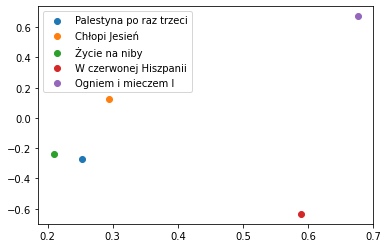

In [27]:
# Dysponując modelem tematów korpusu, zwizualizować położenie poszczególnych dokumentów w dwuwymiarowym układzie współrzędnych kartezjańskich.

books = {0: 'Palestyna po raz trzeci', 1: 'Chłopi Jesień', 2: 'Życie na niby', 3: 'W czerwonej Hiszpanii', 4: 'Ogniem i mieczem I'}

fig, ax = plt.subplots()

for i,null in enumerate(u):
    
    pcaCoord1, pcaCoord2 = u[i]
    book = books[i]
    ax.scatter(pcaCoord1, pcaCoord2, label=book)
    
plt.legend();
plt.show();


# Punkt 5. Skomentować porównanie rezultatów osiągniętych w punktach 3. oraz 4.2.

Komentarz: im punkty widoczne na dwuwymiarowym układzie współrzędnych znajdują się bliżej siebie tym podobieństwo dokumentów, które reprezentują te kropki jest większe ( biorąc pod uwagę przynależność do dwóch zamodelowanych tematów ). Z układu współrzędnych można wyciągnąć wniosek, że największym podobienstwem cechują się dokumenty 'Zycie na niby' oraz 'Palestyna po raz trzeci'. Natomiast dokumenty 'W czerwonej Hiszpanii' oraz 'Ogniem i mieczem I' okazują się być bardzo unikatowe względem przyjętych kryteriów.

W przypadku punktu trzeciego - wyznaczenia najbardziej podobnych dokumentów według macierzy podobieństwa cosinusowego, można zauważyć, że wyniki dla dokumentów 'Palestyna po raz trzeci' i 'Życie na niby' również wskazują na podobieństwo tych dokumentów. Co prawda, dla dokumentu 'Palestyna po raz trzeci' najbardziej podobny okazał się być dokument 'W czerwonej Hiszpanii', jednak na drugim miejscu pod względem podobieństwa znalazło się 'Życie na niby'.

Podobnie dla dokumentu 'Życie na niby' najbardziej podobnym dokumentem okazał się być dokument 'W czerwonej Hiszpanii', jednak na drugim miejscu znalazł się ponownie dokument 'Palestyna po raz trzeci', wyniki dla podobieństwa 'Życie na niby' z oboma dokumentami różniły się jedynie o około 0.007 wartości.

Moją dodatkową obserwacją jest fakt, że dla dokumentu 'Ogniem i mieczem I' według wyników prezentowanych przez macierz podobieństwa cosinusowego nie potwierdziła się jego unikatowość. Dla żadnego z dokumentów nie stanowi dokumentu najmniej podobnego.
